In [1]:
! pip install kaggle

from google.colab import drive
drive.mount('/content/drive')

! cp /content/drive/MyDrive/kaggle.json ~/
! mkdir ~/.kaggle
! mv ~/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [2]:
! kaggle datasets download -d eldarsultanow/polytopes-5d-normalized-reflexive
! unzip polytopes-5d-normalized-reflexive.zip

Dataset URL: https://www.kaggle.com/datasets/eldarsultanow/polytopes-5d-normalized-reflexive
License(s): unknown
  0% 0.00/7.29M [00:00<?, ?B/s]
100% 7.29M/7.29M [00:00<00:00, 85.6MB/s]
Archive:  polytopes-5d-normalized-reflexive.zip
  inflating: polytopes_5d_reflexive.txt  


In [3]:
import sys
import numpy as np
import pandas as pd
import re
from ast import literal_eval
np.set_printoptions(threshold=sys.maxsize)

In [4]:
file_content = ''
with open('polytopes_5d_reflexive.txt', 'r') as file:
    file_content = file.read()

i = 0
lst_polys = []

for line in re.findall(r"^\[.*?\]$", file_content, flags=re.S | re.M):
  try:
    arr, *rest = literal_eval(line.replace("array", ""))
    U, S, Vh = np.linalg.svd(arr, full_matrices=True)
    lst_polys.append([str(arr), np.matrix.trace(U), np.matrix.trace(Vh)] + rest)
    i += 1
  except:
    print("omitting: {0}".format(line))
print("{0} polytopes collected".format(i))

omitting: [['0' '1' '1' '0' '2']
224272 polytopes collected


In [5]:
df = pd.DataFrame(lst_polys, columns=['matrix', 'traceU', 'traceVh', 'vol', 'h11', 'h12', 'h13', 'h22', 'chi', 'numptsM', 'numvertsM', 'numptsN', 'numvertsN'])

In [ ]:
df.head()

matrix    traceU   traceVh  vol  \
0  [[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0...  0.788875  0.137026   24   
1  [[1, 0, 0, 0, 0], [-1, 0, 0, 0, 0], [0, 1, 0, ...  0.589976 -0.850823   28   
2  [[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0...  1.768890 -1.040558   36   
3  [[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0...  1.178932 -1.421765   30   
4  [[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0...  0.942262 -1.471582   28   

   h11  h12  h13   h22   chi  numptsM  numvertsM  numptsN  numvertsN  
0    4    0  232   988  1464       10          8      246         12  
1    4    0  244  1036  1536       10          8      260         13  
2    4    0  171   744  1098       10          9      181          9  
3    4    0  352  1468  2184       10          8      385         14  
4    4    0  222   948  1404       10          8      238         13

In [6]:
df_sub = df.loc[:, df.columns != 'matrix']

In [ ]:
df_sub.head()

traceU   traceVh  vol  h11  h12  h13   h22   chi  numptsM  numvertsM  \
0  0.788875  0.137026   24    4    0  232   988  1464       10          8   
1  0.589976 -0.850823   28    4    0  244  1036  1536       10          8   
2  1.768890 -1.040558   36    4    0  171   744  1098       10          9   
3  1.178932 -1.421765   30    4    0  352  1468  2184       10          8   
4  0.942262 -1.471582   28    4    0  222   948  1404       10          8   

   numptsN  numvertsN  
0      246         12  
1      260         13  
2      181          9  
3      385         14  
4      238         13

In [ ]:
df.to_csv('polytopes_5d_reflexive.csv', index=True)

<Axes: xlabel='traceU', ylabel='traceVh'>

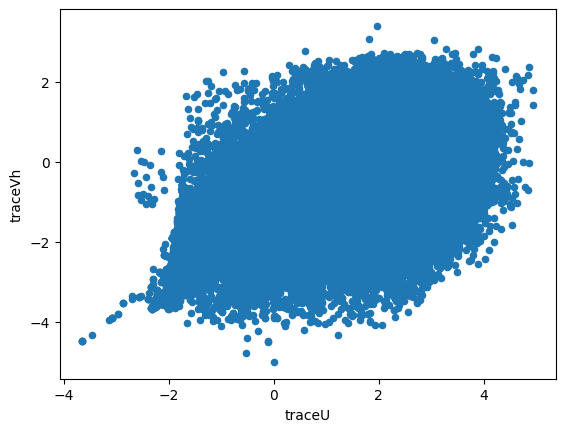

In [ ]:
df.plot.scatter(x='traceU', y='traceVh')

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=5, min_samples=5).fit(df_sub)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((df_sub, labels), axis=1)
result.head()

traceU   traceVh  vol  h11  h12  h13   h22   chi  numptsM  numvertsM  \
0  0.788875  0.137026   24    4    0  232   988  1464       10          8   
1  0.589976 -0.850823   28    4    0  244  1036  1536       10          8   
2  1.768890 -1.040558   36    4    0  171   744  1098       10          9   
3  1.178932 -1.421765   30    4    0  352  1468  2184       10          8   
4  0.942262 -1.471582   28    4    0  222   948  1404       10          8   

   numptsN  numvertsN  Cluster ID  
0      246         12           0  
1      260         13           1  
2      181          9           2  
3      385         14           3  
4      238         13           4

<Axes: xlabel='traceU', ylabel='chi'>

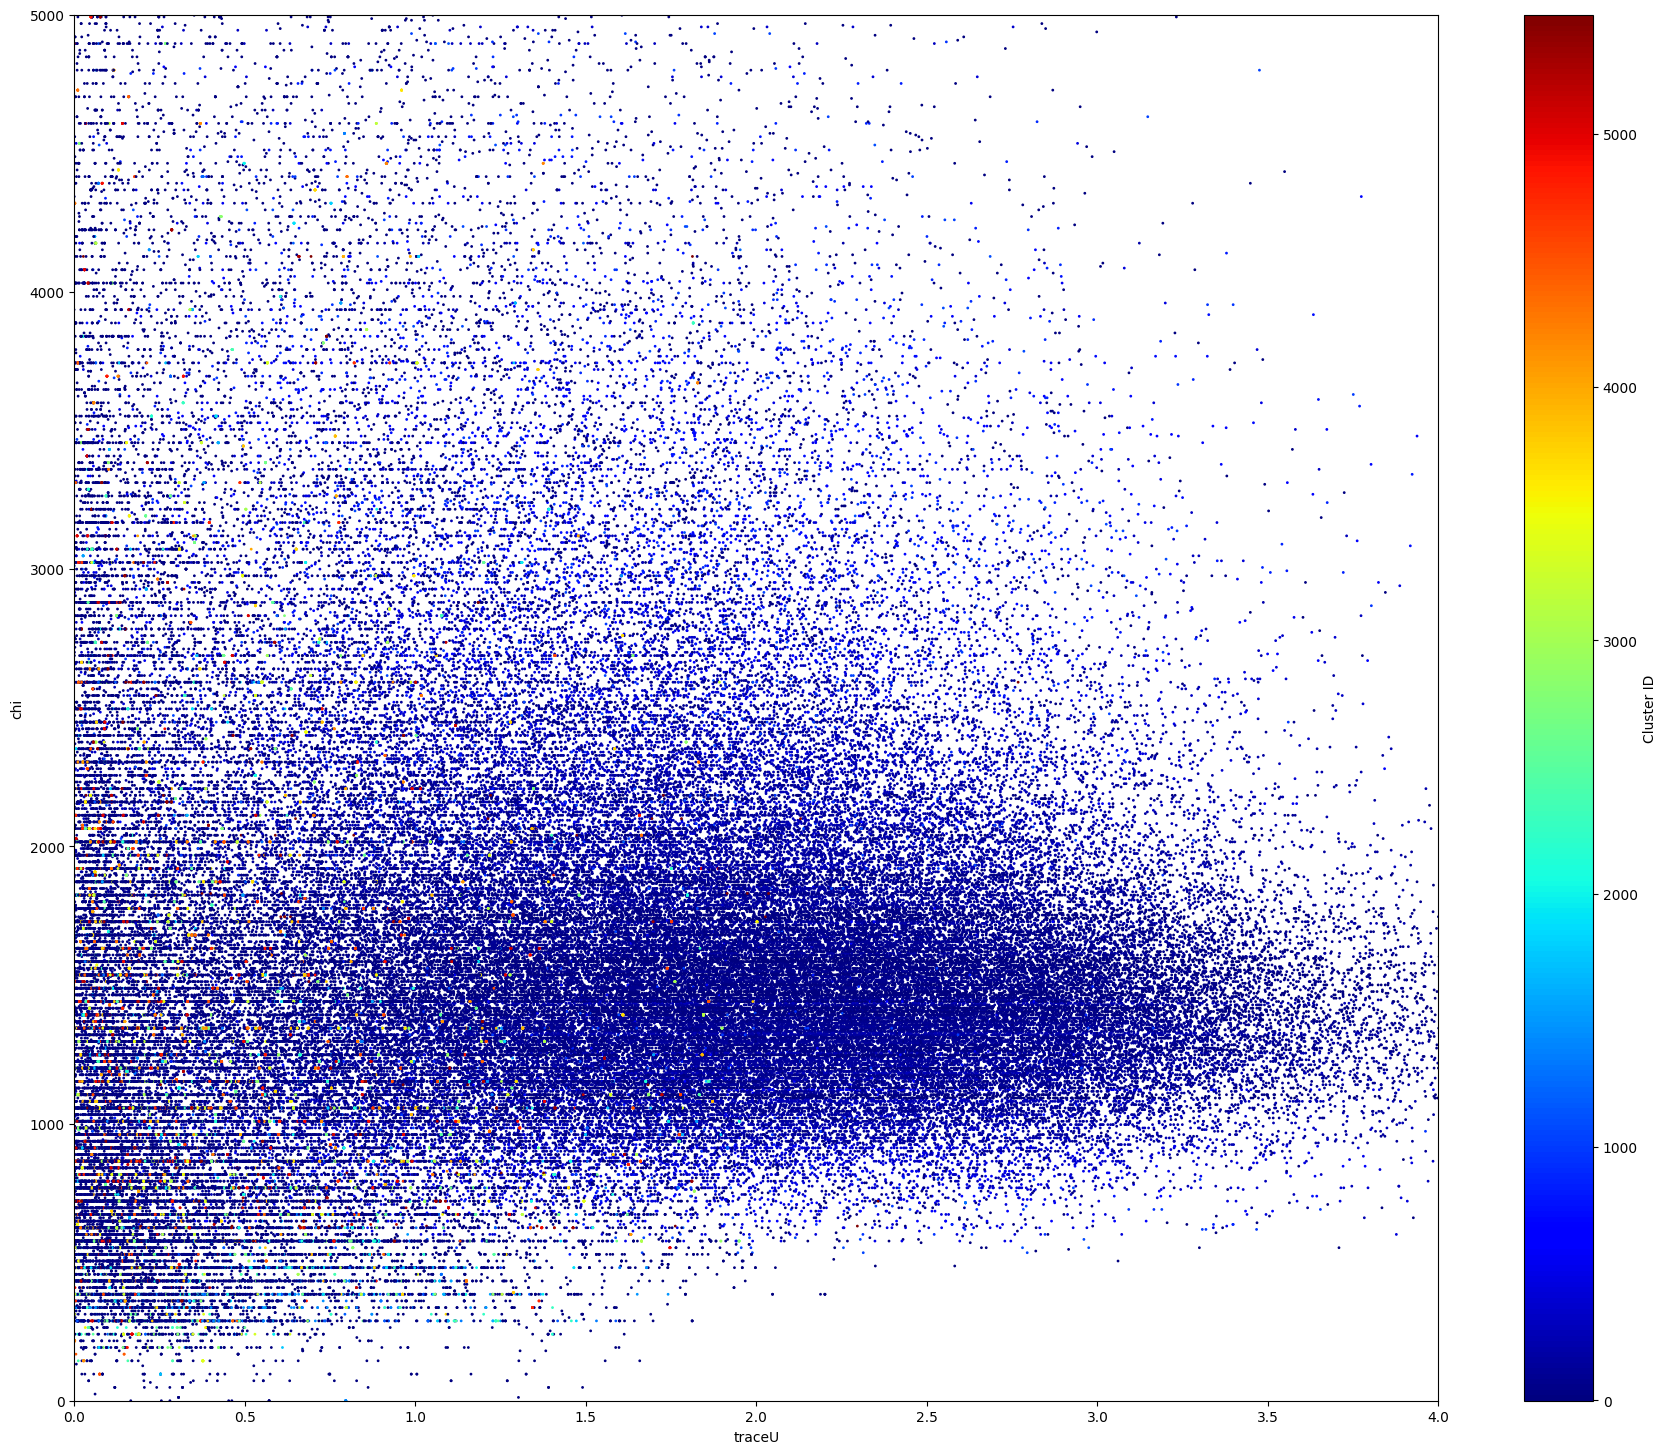

In [ ]:
result.plot.scatter(figsize=(22,18), x='traceU', y='chi', xlim=(0,4), ylim=(0,5000), c='Cluster ID', s=1, colormap='jet')

In [27]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import colormaps
import seaborn as sns

In [8]:
!pip install hdbscan
import hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 83.1 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


Find important features

In [9]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sub)

model = KMeans(n_clusters=4, init = "k-means++", max_iter = 300, n_init = 10, random_state=42)
df_sub['cluster'] = model.fit_predict(df_scaled)

# Filter out noise points
df_filtered = df_sub[df_sub['cluster'] != -1]

# all columns except 'cluster'
features = df_filtered.columns[:-1]
print(features)

X = df_filtered[features]
y = df_filtered['cluster']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importances = pd.DataFrame(rf.feature_importances_, index=features, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

Index(['traceU', 'traceVh', 'vol', 'h11', 'h12', 'h13', 'h22', 'chi',
       'numptsM', 'numvertsM', 'numptsN', 'numvertsN'],
      dtype='object')
           importance
numvertsM    0.250977
numptsM      0.203718
vol          0.166191
numvertsN    0.133680
h11          0.091811
traceU       0.070490
h12          0.020300
h13          0.016915
numptsN      0.014252
chi          0.011080
h22          0.010692
traceVh      0.009894


Find the optimal number of clusters using elbow method

In [68]:
cluster_cols = ['vol','chi','h11']
x = df[cluster_cols].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

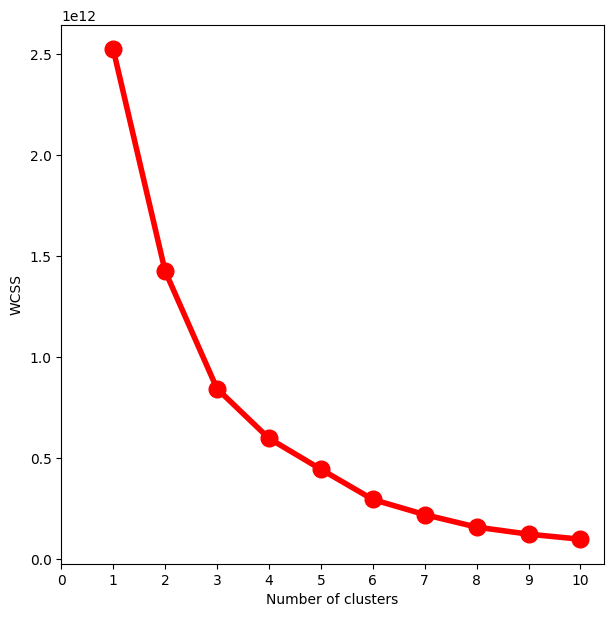

In [60]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i, init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [72]:
model = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=10, cluster_selection_epsilon=50)
y_clusters = model.fit_predict(x)
unique_clusters, unique_cluster_counts = np.unique(y_clusters, return_counts=True)
count_pairs = np.asarray((unique_clusters, unique_cluster_counts)).T
count_pairs = count_pairs[np.argsort(-count_pairs[:, 1])]
num_clusters = len(count_pairs)

num_colors = num_clusters if num_clusters < 20 else 20

print(count_pairs[:10])
print(num_clusters)

[[   463 189895]
 [    -1   6153]
 [   416   5360]
 [   359   2545]
 [   225   2206]
 [   403   2160]
 [   369   1620]
 [   368   1553]
 [   294    900]
 [   182    794]]
465


3D Scatterplot of the clusters

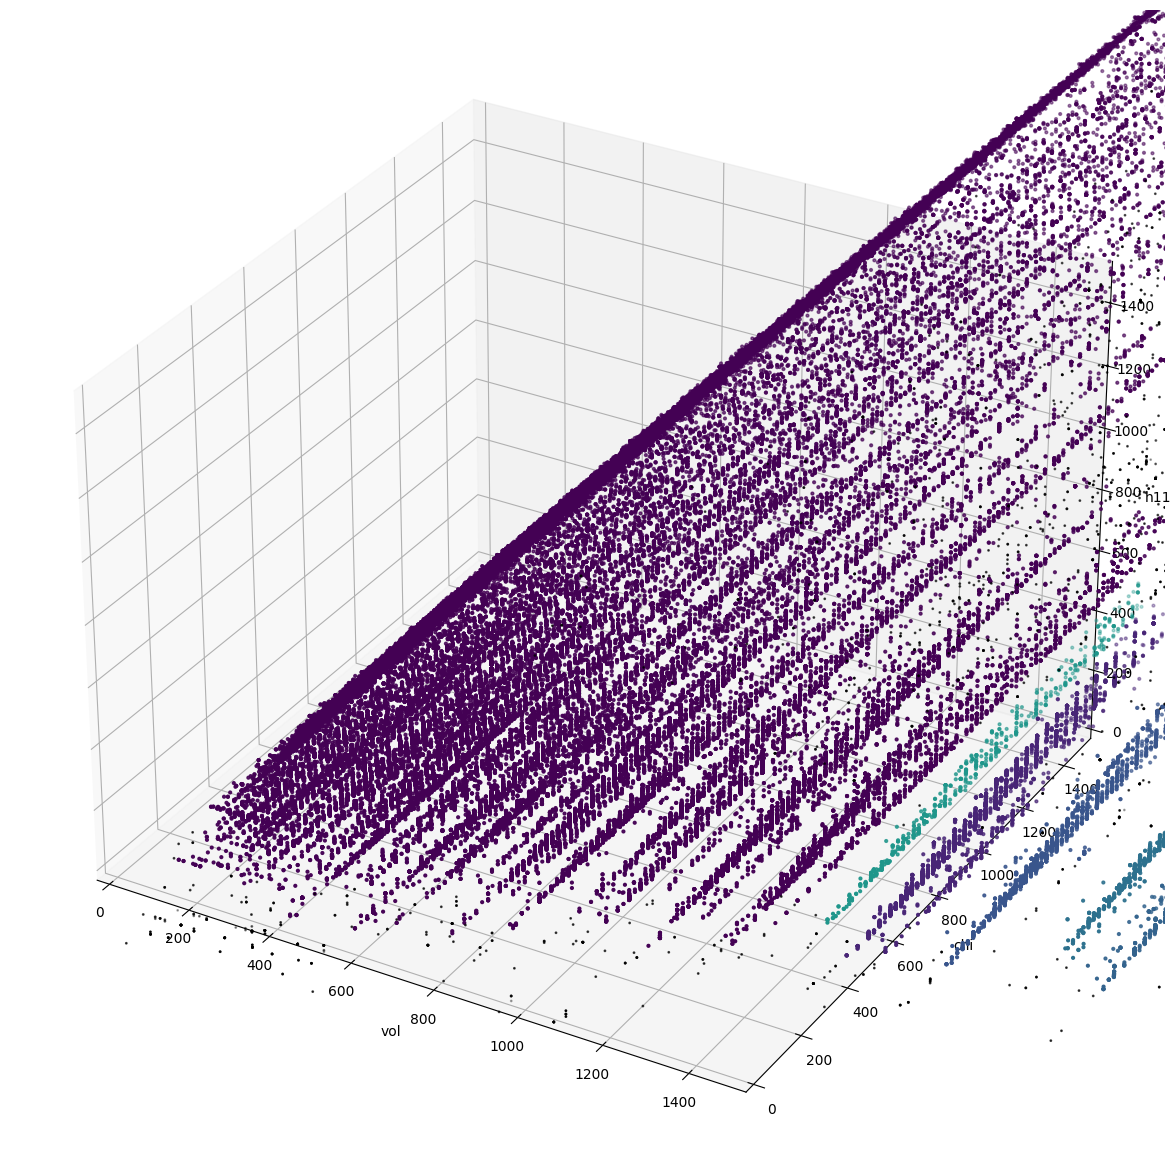

In [73]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

colormap = colormaps['viridis'].resampled(num_colors)

# add points of clusters to highlight
for i in range(0, num_colors):
  cluster_val = count_pairs[i, 0]
  if cluster_val != -1:
    mask = y_clusters == cluster_val
    ax.scatter(x[mask, 0],
               x[mask, 1],
               x[mask, 2],
               s = 4,
               color = colormap(i),
               label = "cluster {0}".format(i))

# add points of remaining clusters
for i in range(num_colors, num_clusters):
  cluster_val = count_pairs[i, 0]
  if cluster_val != -1:
    mask = y_clusters == cluster_val
    ax.scatter(x[mask, 0],
               x[mask, 1],
               x[mask, 2],
               s = 1,
               color = "black",
               label = "cluster {0}".format(i))

# add non-clustered points
mask = y_clusters == -1
ax.scatter(x[mask, 0],
           x[mask, 1],
           x[mask, 2],
           s = 1,
           color = "black",
           label = "non-clustered values")

ax.set_xlim([0, 1500])
ax.set_ylim([0, 1500])
ax.set_zlim([0, 1500])
ax.set_xlabel(cluster_cols[0])
ax.set_ylabel(cluster_cols[1])
ax.set_zlabel(cluster_cols[2])
#ax.legend()
plt.show()

In [76]:
import plotly.graph_objs as go
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots

fig = go.Figure()

Scene = dict(
    xaxis = dict(title = cluster_cols[0], range=[0,1500]),
    yaxis = dict(title = cluster_cols[1], range=[0,1500]),
    zaxis = dict(title = cluster_cols[2], range=[0,200]))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_

colormap = px.colors.sequential.Viridis
colors = px.colors.sample_colorscale(colormap, [i / num_colors for i in range(num_colors)])

# add points of clusters to highlight
for i in range(0, num_colors):
  cluster_val = count_pairs[i, 0]
  if cluster_val != -1:
    mask = y_clusters == cluster_val
    fig.add_trace(go.Scatter3d(
        x=x[mask, 0],
        y=x[mask, 1],
        z=x[mask, 2],
        mode='markers',
        marker=dict(color=colors[i % num_colors], size=2, line=dict(width=0)),
        name="cluster {0}".format(i),
        showlegend=False
    ))

# add points of remaining clusters
for i in range(num_colors, num_clusters):
  cluster_val = count_pairs[i, 0]
  if cluster_val != -1:
    mask = y_clusters == cluster_val
    fig.add_trace(go.Scatter3d(
        x=x[mask, 0],
        y=x[mask, 1],
        z=x[mask, 2],
        mode='markers',
        marker=dict(color="black", size=2, line=dict(width=0)),
        name="cluster {0}".format(i),
        showlegend=False
    ))

# add non-clustered points
mask = y_clusters == -1
fig.add_trace(go.Scatter3d(
    x=x[mask, 0],
    y=x[mask, 1],
    z=x[mask, 2],
    mode='markers',
    marker=dict(color="black", size=2, line=dict(width=0)),
    name="non-clustered values",
    showlegend=False
  ))

# Set up the layout
fig.update_layout(
    margin = dict(l = 0, r = 0),
    scene=Scene,
    height=800,
    width=800,
    legend_title_text='Clusters'
)

fig.show()